# FIT 1043 Assignment 2 
## Philip Ooi | 32495978
### Tutors: Chris Yun, Jesmin Nahar, Saher Manasee
### Due: Wednesday 22nd September 2021 - 11:59 pm [Extension given]


***

### Importing necessary libraries

In [4]:
import pandas as pd #used for our tables
import matplotlib.pylab as plt #graphing
%matplotlib inline
import numpy as np #used for calculations and certain charts such as pie charts

***
## Question 1

### Introduction
This question aims to predict whether a customer of an investor will be likely to pay back their loans in full. This question uses various machine learning techniques such as supervised learning, Decision trees and Random Forest to attempt to predict whether the individual will pay back in full based(<strong>denoted with 1 or 0</strong>) based on the various features unique to each individual such as fico.

***

### Extracting CSV files
We need to extract the files using their commars as the delimiter, thus creating rows and columns using \n and , as the splits

In [5]:
df_loan_data = pd.read_csv("loan_payment_data/loan_data.csv")

In [6]:
df_loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df_loan_data.tail()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [8]:
df_loan_data.sample(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2308,1,0.1379,170.38,11.350407,0.42,737,1140.0,890,6.4,1,0,0,0
2841,1,0.1347,407.08,11.289782,23.83,692,6390.0,8762,31.9,3,0,0,0
5309,1,0.1531,870.39,11.608236,2.69,757,8130.0,11437,16.3,3,0,0,0


***
### Describing data

In [9]:
df_loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


It can be seen in the data thta the highest and lowest fico are 827 and 612. This shows a narrow range of values while the mean of not fully paid is 0.16 which shows that more people have paid back as the mean is a lower number. Public records mean is also quite low with 0.062 showing that many members in this data have not had a bad record. 

In order to make the two histograms we need to split the data by their not.fully.paid category, whether it is paid (1) or not paid(2)

In [10]:
hist_fully_paid = df_loan_data.filter(['fico','not.fully.paid'])
hist_fully_paid.rename(columns = {"not.fully.paid":"not_fully_paid"},inplace = True) #making changes to title as the dots
#would mess with the plotting later
hist_fully_paid

,fico,not_fully_paid
0,737,0
1,707,0
2,682,0
3,712,0
4,667,0
...,...,...
9573,672,1
9574,722,1
9575,687,1
9576,692,1


In [11]:
boolean_filter = hist_fully_paid.not_fully_paid.isin([1])
filtered_df_not_paid = hist_fully_paid[boolean_filter]
filtered_df_not_paid.reset_index(drop = True)


,fico,not_fully_paid
0,667,1
1,722,1
2,682,1
3,687,1
4,677,1
...,...,...
1528,672,1
1529,722,1
1530,687,1
1531,692,1


In [12]:
boolean_filter = hist_fully_paid.not_fully_paid.isin([0])
filtered_df_paid = hist_fully_paid[boolean_filter]
filtered_df_paid

,fico,not_fully_paid
0,737,0
1,707,0
2,682,0
3,712,0
4,667,0
...,...,...
9561,722,0
9562,717,0
9564,687,0
9567,687,0


### <strong>Figure 1 </strong>

<AxesSubplot:>

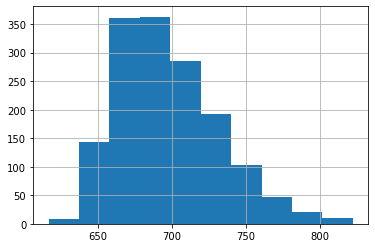

In [13]:
filtered_df_not_paid['fico'].hist()

### <strong>Figure 2 </strong>

<AxesSubplot:>

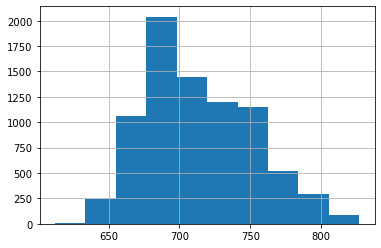

In [14]:
filtered_df_paid['fico'].hist()

## Final side by side histogram

Text(0, 0.5, 'People')

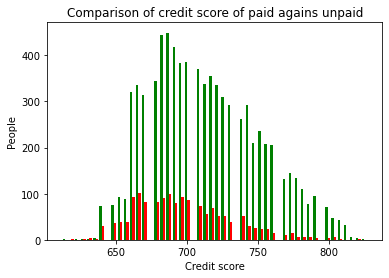

In [15]:
x1 = filtered_df_paid['fico'] 
x2 = filtered_df_not_paid['fico'] 
#the red are people who have paid
#the green are the people who have not paid
compare_fico = plt.hist((x1,x2), bins = 50,color = ['g','r'])
plt.title("Comparison of credit score of paid agains unpaid")
plt.xlabel("Credit score")
plt.ylabel("People")

### Description 
This histogram shows the side by side of both types of people who have either paid or not paid. It can be seen from the histogram that the people who have fully paid their loans have a generally higher credit score than those who have not paid their loans. The graph of <strong>figure 1</strong> show a very negative leaning graph which which skews positively. This means that the majority of people who have paid fully have a higher credit score than thoes who do not.

### 

Text(0, 0.5, 'Credit score')

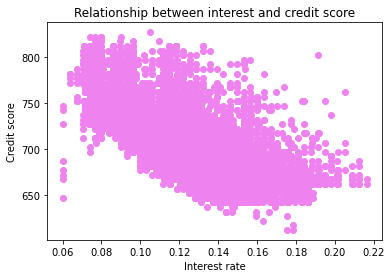

In [16]:

plt.scatter(x = df_loan_data['int.rate'],y = df_loan_data['fico'], color = 'violet')
plt.title("Relationship between interest and credit score")
plt.xlabel("Interest rate")
plt.ylabel("Credit score")

## Graph description and analysis 
A scatter plot was chosen to show the relationship between the two different variables, as it could show the general trend of the data with such a large spread of data values. The shape of the scatter plot allows the user to predict the trend and it is from this that we can assume that a higher credit score leads to a lower interest rate.

***
## Supervised Learning
This section aims to use supervised machine learning to predict whether the user will pay in full based on their credit(fico) score. The data will be split into a 80% training and 20% testing before undertaking machine learning. <br><strong>The label in this section (the dependent variable) is the not.fully.paid.</strong>

In [17]:
#imports needed for machine learning and training
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

Supervised machine learning separates itself from other forms of machine learning through the use of training data sets. Unlike unsupervised machine learning, supervised machine learning makes use of labelled data(data that is classified e.g with a tag or name) to train and analyse before predicting future events. This data that is used to "teach" the machine is known as a training dataset. After sufficient training, the system is then able to provide a predicted output for any input given. To check whether the training is sufficient, the data is split into two parts of training and testing data. After training using the training dataset, the predictions of the machine are crosschecked agains the testing data section of known values. Through this we can measure the efficiency and accuracy of the machine training. 

In [18]:
filt = ['int.rate','log.annual.inc',]

### The fields of interest(Features):
• credit.policy: 1 if the customer meets the credit underwriting criteria of investor, and 
0 otherwise.

• int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored 
as 0.11). Borrowers judged by investors to be more risky are assigned higher interest 
rates.

• installment: The monthly installments owed by the borrower if the loan is funded.

• log.annual.inc: The natural log of the self-reported annual income of the borrower.

• dti: The debt-to-income ratio of the borrower (amount of debt divided by annual
income).

• fico: The credit score of the borrower.

• days.with.cr.line: The number of days the borrower has had a credit line.

• revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit 
card billing cycle)

• revol.util: The borrower's revolving line utilization rate (the amount of the credit line 
used relative to total credit available).

• inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

• delinq.2yrs: The number of times the borrower had been 30+ days past due on a 
payment in the past 2 years.

• pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax 
liens, or judgments)



### Label:
<b>not.fully.paid:</b> 0 indicates they have paid fully, 1 they have not paid fully.

In [19]:
#splitting the data X and y 
X = df_loan_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].values
Y = df_loan_data.iloc[:,12].values
#checking the splitting of X and Y 
print(X[395:400])
print(Y[395:400])

[[1.00000000e+00 9.20000000e-02 3.06180000e+02 1.10348897e+01
  1.31200000e+01 7.42000000e+02 5.25004167e+03 2.44060000e+04
  4.03000000e+01 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 9.51000000e-02 5.92700000e+02 1.03417425e+01
  1.64900000e+01 7.47000000e+02 4.26004167e+03 2.59460000e+04
  3.79000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01400000e-01 6.11100000e+02 1.06919449e+01
  9.79000000e+00 7.32000000e+02 5.94004167e+03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 9.51000000e-02 4.61350000e+02 1.13858645e+01
  9.96000000e+00 7.32000000e+02 5.25004167e+03 4.76500000e+03
  1.65000000e+01 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.58300000e-01 8.41760000e+02 1.12252434e+01
  1.53800000e+01 6.62000000e+02 3.42004167e+03 1.52220000e+04
  7.73000000e+01 0.00000000e+00 2.00000000e+00 0.00000000e+00]]
[1 0 0 0 0]


In [20]:
#Splitting data 
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size = 0.2, random_state = 0
)

### Splitting between test and training
The data given should be split in between 

In [21]:
print(X_train) 
print(X_test)

[[1.0000e+00 7.7400e-02 1.5610e+02 ... 2.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.0640e-01 5.0490e+01 ... 1.1000e+01 1.0000e+00 0.0000e+00]
 [1.0000e+00 1.3990e-01 8.5432e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 1.7740e-01 7.2042e+02 ... 3.0000e+00 0.0000e+00 1.0000e+00]
 [1.0000e+00 1.2840e-01 4.0342e+02 ... 2.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.2210e-01 3.9978e+02 ... 2.0000e+00 0.0000e+00 0.0000e+00]]
[[1.0000e+00 1.1890e-01 4.9750e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.2210e-01 8.4120e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.6950e-01 7.1254e+02 ... 2.0000e+00 2.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 1.4110e-01 3.4229e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.3850e-01 5.1838e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0140e-01 4.2114e+02 ... 2.0000e+00 0.0000e+00 0.0000e+00]]


In [22]:
print(Y_train)
print(Y_test)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]


*** 
## Classification 

### Binary and Multi-Class classification 
#### <u>Binary</u>
Binary Classification is the classification of data or elements into two distinctive groups (e.g dead/alive, 1/0, male/female). It is a prediction on whether the data of interest belongs in either of the groups specified. Binary classification usually uses algorithms such as decision trees to predict outcomes. 
<br>
#### <u>Multi-Class</u>
Multi-Class Classification is a classification of data or elements into <strong>many</strong> different groups, not just 2 distinct groups. Multi-Class Classification usually uses algorithms such as random forrest to predict outcomes.
<br>
#### <u>Assignment Classification</u>
This assignment uses a binary classification system of paid and not paid to split people into two distinct categories 

In [23]:
#Importing decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Normalising data
The two data in the X_train and X_test, need to be normalised. This is due to the difference in the data. 

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#setting classifier
classifier = DecisionTreeClassifier(
            criterion = 'entropy', 
            random_state = 0
            )
#teaching our model 
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
X_train,Y_train

(array([[ 0.49113311, -1.68138005, -0.79034041, ...,  0.18999668,
         -0.29674081, -0.24019942],
        [-2.0361079 , -0.59953626, -1.30015637, ...,  4.28558618,
          1.51635976, -0.24019942],
        [ 0.49113311,  0.65017986,  2.58020877, ..., -0.72013432,
          1.51635976, -0.24019942],
        ...,
        [ 0.49113311,  2.0491158 ,  1.9338272 , ...,  0.64506218,
         -0.29674081,  3.46283471],
        [ 0.49113311,  0.22117283,  0.40355868, ...,  0.18999668,
         -0.29674081, -0.24019942],
        [ 0.49113311, -0.01384841,  0.38598714, ...,  0.18999668,
         -0.29674081, -0.24019942]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [27]:
X_test,Y_test

(array([[ 0.49113311, -0.13322427, -1.3037286 , ..., -0.72013432,
         -0.29674081, -0.24019942],
        [ 0.49113311, -0.01384841, -1.13781274, ..., -0.26506882,
         -0.29674081, -0.24019942],
        [ 0.49113311,  1.75440663,  1.89578772, ...,  0.18999668,
          3.32946034, -0.24019942],
        ...,
        [ 0.49113311,  0.69494581,  0.10846305, ..., -0.72013432,
         -0.29674081, -0.24019942],
        [ 0.49113311,  0.59795291,  0.95851032, ..., -0.72013432,
         -0.29674081, -0.24019942],
        [ 0.49113311, -0.78606105,  0.48909924, ...,  0.18999668,
         -0.29674081, -0.24019942]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

### Predicting values
NB. The values used here have been normalised using sklearn and are NOT a true reperesentation of the original data. 

In [28]:
Y_pred = classifier.predict(X_test)
df_prediction = pd.DataFrame(X_test,Y_pred)
df_prediction = df_prediction.reset_index(drop=False)
df_prediction = df_prediction.rename(columns={
    "index":"not_paid_prediction",
    0:"credit.policy",
    1:"int.rate",
    2:"installment",
    3:"log.annual.inc",
    4:"dti",
    5:"fico",
    6:"days.with.cr.line",
    7:"revol.bal",
    8:"revol.util",
    9:"inq.last.6mths",
    10:"delinq.2yrs",
    11:"pub.rec"
    })
df_prediction

,not_paid_prediction,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0,0.491133,-0.133224,-1.303729,-0.183343,0.629609,-0.634896,-0.896101,-0.464108,0.596380,-0.720134,-0.296741,-0.240199
1,0,0.491133,-0.013848,-1.137813,-1.203518,-0.367630,-0.107357,-0.732477,-0.330767,-0.819921,-0.265069,-0.296741,-0.240199
2,0,0.491133,1.754407,1.895788,1.590433,0.156392,-1.030551,0.095335,-0.021038,1.630176,0.189997,3.329460,-0.240199
3,0,0.491133,1.918548,-0.159503,0.403591,1.024440,-1.162436,0.958609,0.076626,0.696313,-0.265069,-0.296741,3.462835
4,0,-2.036108,0.325627,-0.566303,-2.524781,-1.180517,-1.426206,-1.454283,-0.341593,0.086374,3.375455,-0.296741,-0.240199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0,0.491133,1.754407,-0.167999,2.416200,-0.591174,-1.294321,0.201752,0.851363,1.712879,0.645062,-0.296741,-0.240199
1912,0,-2.036108,1.142605,-0.703545,-0.734793,-1.350352,-1.162436,0.071667,-0.408464,0.568812,1.100128,-0.296741,-0.240199
1913,0,0.491133,0.694946,0.108463,0.405840,1.766199,-0.898666,-0.989509,0.804774,1.130508,-0.720134,-0.296741,-0.240199
1914,0,0.491133,0.597953,0.958510,1.293374,-1.819214,-0.503011,-0.921707,-0.491587,-1.612498,-0.720134,-0.296741,-0.240199


### Checking accuracy of our prediction 

In [29]:
classifier.score(X_test,Y_test)

0.7609603340292276

In [30]:
matDecisionTree = confusion_matrix(Y_test,Y_pred)
matDecisionTree

array([[1378,  237],
       [ 221,   80]], dtype=int64)

### Decision Tree Matrix 
It is shown in our decision tree matrix that there were 1378 correct no predictions however there were more wrong when predicting yes with 237 wrong yes predicitons.

### Using Random Forrest 

In [31]:
classifier_RandomFor = RandomForestClassifier(
                        n_estimators = 40, 
                        criterion = 'entropy', 
                        random_state = 0
                        )
#Training our model 
classifier_RandomFor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

### Predicting values using Random Forest
NB. The values used here have been normalised using sklearn and are NOT a true reperesentation of the original data. 

In [32]:
Y_pred = classifier_RandomFor.predict(X_test)
df_prediction = pd.DataFrame(X_test,Y_pred)
df_prediction = df_prediction.reset_index(drop=False)
df_prediction = df_prediction.rename(columns={
    "index":"not_paid_prediction",
    0:"credit.policy",
    1:"int.rate",
    2:"installment",
    3:"log.annual.inc",
    4:"dti",
    5:"fico",
    6:"days.with.cr.line",
    7:"revol.bal",
    8:"revol.util",
    9:"inq.last.6mths",
    10:"delinq.2yrs",
    11:"pub.rec"
    
    })
df_prediction

,not_paid_prediction,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0,0.491133,-0.133224,-1.303729,-0.183343,0.629609,-0.634896,-0.896101,-0.464108,0.596380,-0.720134,-0.296741,-0.240199
1,0,0.491133,-0.013848,-1.137813,-1.203518,-0.367630,-0.107357,-0.732477,-0.330767,-0.819921,-0.265069,-0.296741,-0.240199
2,0,0.491133,1.754407,1.895788,1.590433,0.156392,-1.030551,0.095335,-0.021038,1.630176,0.189997,3.329460,-0.240199
3,0,0.491133,1.918548,-0.159503,0.403591,1.024440,-1.162436,0.958609,0.076626,0.696313,-0.265069,-0.296741,3.462835
4,1,-2.036108,0.325627,-0.566303,-2.524781,-1.180517,-1.426206,-1.454283,-0.341593,0.086374,3.375455,-0.296741,-0.240199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0,0.491133,1.754407,-0.167999,2.416200,-0.591174,-1.294321,0.201752,0.851363,1.712879,0.645062,-0.296741,-0.240199
1912,0,-2.036108,1.142605,-0.703545,-0.734793,-1.350352,-1.162436,0.071667,-0.408464,0.568812,1.100128,-0.296741,-0.240199
1913,0,0.491133,0.694946,0.108463,0.405840,1.766199,-0.898666,-0.989509,0.804774,1.130508,-0.720134,-0.296741,-0.240199
1914,0,0.491133,0.597953,0.958510,1.293374,-1.819214,-0.503011,-0.921707,-0.491587,-1.612498,-0.720134,-0.296741,-0.240199


### Checking Accuracy
In this segment, the random forest performed much better than the decision tree and this is shown in both the confusion matrix and the score. With the matrix predicting 1604 correct no responses however yes responses were still more incorrectly predicted. Despite this, there are less wrong predictions in comparison to the decision tree.

In [33]:
Random_Tree_Matrix = confusion_matrix(Y_test,Y_pred)
Random_Tree_Matrix

array([[1604,   11],
       [ 292,    9]], dtype=int64)

In [34]:
classifier_RandomFor.score(X_test, Y_test)

0.8418580375782881

***
## Conclusion 

It can be concluded that overall the Random Forest had a better scoring with a classfier score of 0.84 compared to the decision tree classifier at 0.76. It can be predicted that the reason for this is because of the decision tree's limitations when predicting many continuous features. Another reason would be the decision tree's tendency to overfit data in comparison to the Random Forest algorithms. This leads to less accurate predicted data. 

***
## Question 2

## Introduction 
This question aims to predict whether a mobile application or a website is more beneficial to an Ecommerce compnay that sells clothing online. To achieve this, methods such as scatter plots to find correlation and a linear regression is used. 

### Extracting CSV

In [36]:
customer_shop = pd.read_csv("loan_payment_data/customers-shop.csv")
customer_shop

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [37]:
customer_shop.head()

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [38]:
customer_shop.tail()

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [39]:
customer_shop.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


***
### Description 
From the descriptive statistics obtained, it can be seen that users spend more time on the website with a mean of 37 in comparison to a mean of 12 in a mobile application. The hours spent on the website are also longer for the minimum and maximum time with 33 hours minimum on a website while a moblie site has 8 hours as their minimum.

***
### Visualisation - Graphing

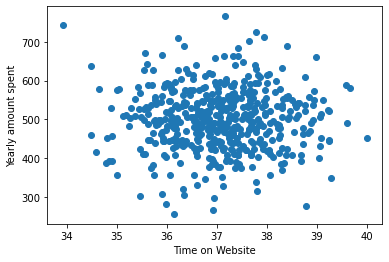

In [40]:
plt.scatter(x = customer_shop['Time on Website'], y = customer_shop['Yearly Amount Spent'])
plt.xlabel("Time on Website")
plt.ylabel("Yearly amount spent")
plt.show()

### Analysis
Judging from the dispersed scattering, it can be predicted that there is little to no correlation between the time spent on the website and the yearly amount spend. This does not make sense as there should be some correlation between the two as it is shown that the majority of time on the site is spent on a website instead of a moblie application.

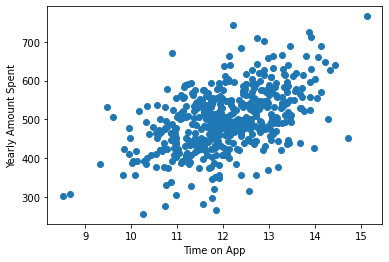

In [41]:
plt.scatter(x = customer_shop['Time on App'], y = customer_shop['Yearly Amount Spent'])
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.show()

### Analysis 
From the scatter plot, in comparison to the 'time spent on website' we can see a positive correlation between time spent on the app and the yearly amount spent. 

***
## Supervised Learning
When using supervised machine learning, an aspect is the splitting of data into training and testing. The training data is used to "teach" the machine to recognise a general trend and attempt to predict the next outcome. The degree of prediction varies with how precise you want the machine to learn the trends. This can lead to a problem known as overfitting which leads to inaccurate predictions as the degree of prediction is too precise and has no room for errors or flexibility. The testing section of the data is where the machine makes predictions about known data and its outputs. The predictions can be cross checked with the actual data to see if the machine has been trained well to predict as the actual data serves as a guideline for a proper prediction.

In [42]:
customer_shop

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### Labels and features
#### Label:
The label would be the yearly amount spent

#### Features:
- Avg.Session Length
- Time on App(in moblie regression)
- Time on Website(in website regression)
- Length of membership 

In [43]:
X_time_on_mobile = customer_shop.iloc[:,[2]]
X_time_on_website = customer_shop.iloc[:,[3]]
Y_yearly_gain = customer_shop.iloc[:,5]



In [44]:
X_time_on_mobile.head(),X_time_on_website.head(),Y_yearly_gain.head()

(   Time on App
 0    12.655651
 1    11.109461
 2    11.330278
 3    13.717514
 4    12.795189,
    Time on Website
 0        39.577668
 1        37.268959
 2        37.110597
 3        36.721283
 4        37.536653,
 0    587.951054
 1    392.204933
 2    487.547505
 3    581.852344
 4    599.406092
 Name: Yearly Amount Spent, dtype: float64)

## Training moblie data 

In [45]:
X_train_mob, X_test_mob, Y_train_mob_yearly_gain,Y_test_mob_yearly_gain = train_test_split(
    X_time_on_mobile,Y_yearly_gain,
    test_size = 0.3, #sets testing size to 30% as per specifications 
    random_state = 0
)

In [46]:
X_train_mob.head(),X_test_mob.head(),Y_train_mob_yearly_gain.head(),Y_test_mob_yearly_gain.head()

(     Time on App
 141    12.418962
 383    13.130022
 135    12.703688
 493    12.625433
 122    11.113330,
      Time on App
 90     12.530357
 254    12.326291
 283    11.466984
 445    11.732991
 461    11.371767,
 141    472.992247
 383    583.977802
 135    482.353570
 493    627.603319
 122    514.239521
 Name: Yearly Amount Spent, dtype: float64,
 90     449.070319
 254    482.602467
 283    374.269675
 445    513.153112
 461    502.771075
 Name: Yearly Amount Spent, dtype: float64)

## Training Website Data

In [47]:
X_train_web, X_test_web, Y_train_web_yearly,Y_test_web_yearly = train_test_split(
    X_time_on_website,Y_yearly_gain,
    test_size = 0.3,
    random_state = 0
)

In [48]:
X_train_web.head(),X_test_web.head(),Y_train_web_yearly.head(),Y_test_web_yearly.head()

(     Time on Website
 141        35.977652
 383        35.429334
 135        36.100914
 493        35.539142
 122        37.387946,
      Time on Website
 90         37.875219
 254        36.673878
 283        35.675728
 445        35.633954
 461        35.261498,
 141    472.992247
 383    583.977802
 135    482.353570
 493    627.603319
 122    514.239521
 Name: Yearly Amount Spent, dtype: float64,
 90     449.070319
 254    482.602467
 283    374.269675
 445    513.153112
 461    502.771075
 Name: Yearly Amount Spent, dtype: float64)

### Normalising the data 
The two data in the X_train and X_test, need to be normalised. This is to make sure that there is no large difference in the values that could skew the data or create a lot of processing due to the large range of values

In [49]:
### Normalising data
sc = StandardScaler()
X_train_mob = sc.fit_transform(X_train_mob)
X_test_mob = sc.transform(X_test_mob)
X_train_web = sc.fit_transform(X_train_web)
X_test_web = sc.transform(X_test_web)

## Linear Regression 
Now that we have all our testing and training data ready, we can now train a linear regression model to test whether a mobile or website would be better in yearly income 

## Importing the necessary libraries

In [50]:
#importing files used in linear regression
#directions and syntax given by: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #r2 can also use score()

## Linear regression for mobile application 

In [51]:
regression_line = LinearRegression()

#training the model 
regression_line.fit(X_train_mob,Y_train_mob_yearly_gain)

#predictions 
mob_prediction_y = regression_line.predict(X_test_mob)



### Visualising the data 

Text(0.5, 1.0, 'Regression of mobile data [figure 1]')

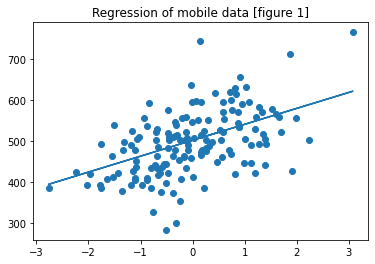

In [52]:
plt.scatter(X_test_mob,Y_test_mob_yearly_gain)
plt.plot(X_test_mob,mob_prediction_y)
plt.title("Regression of mobile data [figure 1]")

### Prediction and analysis
It can be shown from the linear regression that there is an upwards trend in mobile usage and yearly gain. This prediction can be reinforced by the coefficient of determination of -2 which means that a large percentage of values can be explained by regression line

### Metrics of accuracy of the Linear regression (R-squared and MSE)

In [53]:
print("The mean squared error for this linear Regression is " + str(mean_squared_error(mob_prediction_y,Y_test_mob_yearly_gain)))

The mean squared error for this linear Regression is 4643.608999783545


In [54]:
print("The Coefficient of determination for this linear regression is " + str(r2_score(mob_prediction_y,Y_test_mob_yearly_gain)))

The Coefficient of determination for this linear regression is -2.084009798843292


## Linear regression for website

In [55]:
#training the model 
regression_line.fit(X_train_web,Y_train_web_yearly)
#predictions 
web_prediction_y = regression_line.predict(X_test_web)

Text(0.5, 1.0, 'Regression of web data [figure 2]')

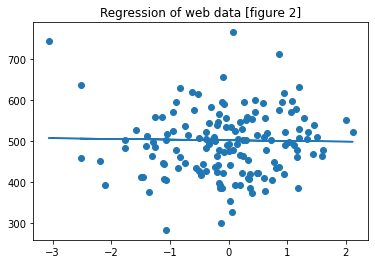

In [56]:
plt.scatter(X_test_web,Y_test_web_yearly)
plt.plot(X_test_web,web_prediction_y)
plt.title("Regression of web data [figure 2]")


### Prediction and analysis
It is very hard to predict the final outcome of this data as it is very scattered. This is reinforced by the calculation of the coefficient of determination of -2725 which shows a <strong>very</strong> strong lack of explanation from the regression line making this very hard to predict. 

### Metrics of accuracy of the Linear regression (R-squared and MSE)

In [57]:
print("The mean squared error for this linear Regression is " + str(mean_squared_error(web_prediction_y,Y_test_web_yearly)))

The mean squared error for this linear Regression is 6344.770178520485


In [58]:
print("The Coefficient of determination for this linear regression is " + str(r2_score(web_prediction_y,Y_test_web_yearly)))

The Coefficient of determination for this linear regression is -2725.3477964277913


***
## Conclusion 


In conclusion, the moblie application is a more important variable when increasing the yearly_amount_spent. This can be seen in <strong>[figure 1]</strong> where there is a strong positive correlation as seen in the increase of the regression line. However, the data given for the web developmenet did not make much sense as seen in <strong>[figure 2]</strong> as the coefficient of determination could barely explain the spread of values. Therefore a sound conclusion of whether the company should be focusing on only the moblie application is still difficult to confirm as the majority of the time spent on the Ecommerce platform is through a website, however evidence of a higher spending is evident through the regression of the moblie application.